In [1]:
import pandas as pd
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
sklearn.__version__

'1.0.2'

In [3]:
# !pip install pyarrow

In [4]:
jan_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [5]:
# Q1 Read the data for January. How many columns are there?
jan_df.shape

(3066766, 19)

In [6]:
# Q2 What's the standard deviation of the trips duration in January
jan_df['duration'] = (jan_df['tpep_dropoff_datetime'] - jan_df['tpep_pickup_datetime']).astype('timedelta64[m]')

In [7]:
jan_df['duration'].std()

42.594499992966355

In [8]:
jan_df = jan_df[['PULocationID', 'DOLocationID', 'duration']]

<AxesSubplot:>

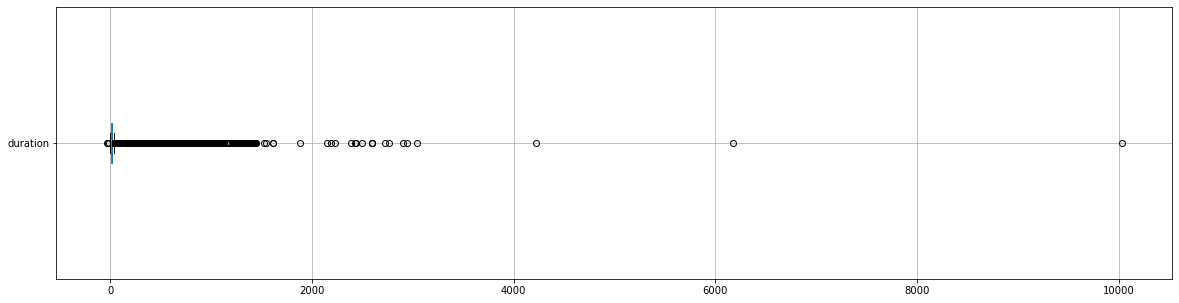

In [9]:
# Q3 Check the distribution of the duration variable. There are some outliers. 
# Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).
# What fraction of the records left after you dropped the outliers?
jan_df.boxplot(column='duration', figsize=(20, 5), vert=False)

In [10]:
filtered_jan_df = jan_df.loc[(jan_df['duration'] >= 1) & (jan_df['duration'] <= 60)]

In [11]:
len(filtered_jan_df) / len(jan_df) * 100

98.18303711466737

In [12]:
# Q4 Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.
# Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
# Fit a dictionary vectorizer
# Get a feature matrix from it
# What's the dimensionality of this matrix (number of columns)?

In [13]:
filtered_jan_df['PULocationID'] = filtered_jan_df['PULocationID'].astype('str')
filtered_jan_df['DOLocationID'] = filtered_jan_df['DOLocationID'].astype('str')

/tmp/ipykernel_55096/3422988404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jan_df['PULocationID'] = filtered_jan_df['PULocationID'].astype('str')
/tmp/ipykernel_55096/3422988404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jan_df['DOLocationID'] = filtered_jan_df['DOLocationID'].astype('str')


In [14]:
locations_jan = filtered_jan_df[['PULocationID', 'DOLocationID']].to_dict('records')

In [15]:
v = DictVectorizer()
X_train = v.fit_transform(locations_jan)

In [16]:
X_train.shape

(3011044, 515)

In [17]:
# Q5 Train a plain linear regression model with default parameters, where duration is the response variable
# Calculate the RMSE of the model on the training data

In [18]:
reg = LinearRegression()
reg.fit(X_train, filtered_jan_df['duration'])

LinearRegression()

In [19]:
y_pred_jan = reg.predict(X_train)
mean_squared_error(filtered_jan_df['duration'], y_pred_jan, squared=False)

7.688651659305238

In [20]:
# Q6 Now let's apply this model to the validation dataset (February 2023).
# What's the RMSE on validation?
feb_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
feb_df['duration'] = (feb_df['tpep_dropoff_datetime'] - feb_df['tpep_pickup_datetime']).astype('timedelta64[m]')
feb_df = feb_df.loc[(feb_df['duration'] >= 1) & (feb_df['duration'] <= 60)]
feb_df = feb_df[['PULocationID', 'DOLocationID', 'duration']]

In [21]:
feb_df['PULocationID'] = feb_df['PULocationID'].astype('str')
feb_df['DOLocationID'] = feb_df['DOLocationID'].astype('str')

In [22]:
locations_feb = feb_df[['PULocationID', 'DOLocationID']].to_dict('records')

In [23]:
del jan_df
del X_train
X_val = v.transform(locations_feb)

In [24]:
y_pred_feb = reg.predict(X_val)
mean_squared_error(feb_df['duration'], y_pred_feb, squared=False)

7.868985034138532